In [13]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import linear_model
from sklearn.cross_decomposition import PLSRegression

In [14]:
n = 1000
p = 10

In [15]:
X = np.random.normal(size = n*p).reshape((n, p))
Y = X[:, 0] + 2*X[:, 1] + np.random.normal(size=n * 1) +5

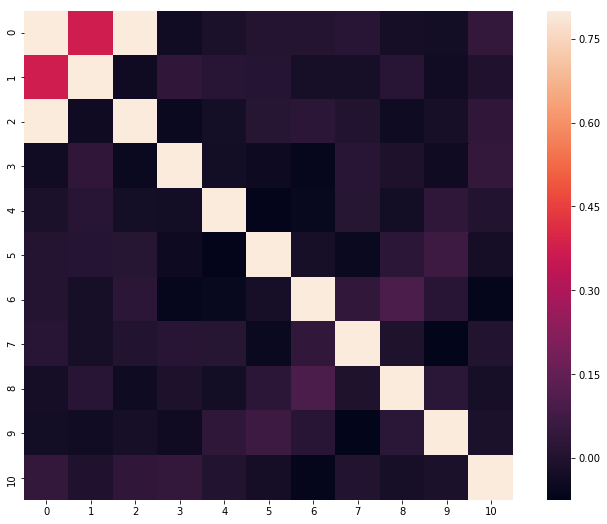

In [16]:
f, au = plt.subplots(figsize=(12, 9))
corrmatr = pd.DataFrame(np.insert(X, 0, Y, axis=1)).corr()
sns.heatmap(corrmatr, vmax=.8, square=True)

In [17]:
from sklearn.cross_decomposition import PLSRegression
regr = linear_model.LinearRegression()
regr.fit(X, Y)

# Save predicted values.
Y_pred = regr.predict(X)
print('R-squared regression:', regr.score(X, Y))

# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 3 dimensions.
pls1 = PLSRegression(n_components=3)

# Reduce X to R(X) and regress on y.
pls1.fit(X, Y)

# Save predicted values.
Y_PLS_pred = pls1.predict(X)
print('R-squared PLSR:', pls1.score(X, Y))

R-squared regression: 0.839098315608346
R-squared PLSR: 0.8390980926907498


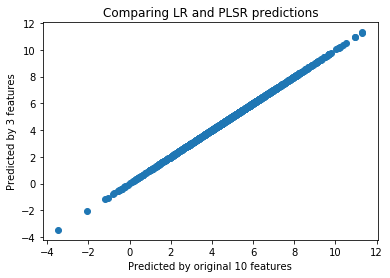

In [18]:
# Compare the predictions of the two models
plt.scatter(Y_pred,Y_PLS_pred) 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 3 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

In [19]:
# Now change the number of components to 4
pls2 = PLSRegression(n_components=4)

# Reduce X to R(X) and regress on y.
pls2.fit(X, Y)

# Save predicted values.
Y_PLS_pred_2 = pls2.predict(X)
print('R-squared regression:', regr.score(X, Y))
print('R-squared PLSR:', pls2.score(X, Y))

R-squared regression: 0.839098315608346
R-squared PLSR: 0.8390983134852776


In [20]:
# Change how Y is constructed
Y2 = X[:, 5] + X[:, 7] + X[:, 9] + np.random.normal(size=n * 1) +5
regr2 = linear_model.LinearRegression()
regr2.fit(X, Y2)

# Save predicted values.
Y_pred = regr2.predict(X)
print('R-squared regression:', regr.score(X, Y2))

# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 3 dimensions.
pls3 = PLSRegression(n_components=4)

# Reduce X to R(X) and regress on y.
pls3.fit(X, Y2)

# Save predicted values.
Y_PLS_pred = pls1.predict(X)
print('R-squared PLSR:', pls1.score(X, Y2))


R-squared regression: -1.240195531266167
R-squared PLSR: -1.2401325775698604
